<a href="https://colab.research.google.com/github/JERWIN0/BAT404_FIREMAN/blob/main/Explanatory_Analysis_of_Wildfires_Occurrence_Worldwide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
from google.colab import data_table

In [13]:
url = 'https://raw.githubusercontent.com/JERWIN0/BAT404_FIREMAN/main/California_Fire_Incidents.csv'

In [14]:
ds = pd.read_csv(url)

In [15]:
ds.head(501)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013.0,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013.0,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013.0,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013.0,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013.0,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,215.0,False,CAL FIRE Sonoma-Lake-Napa Unit,NaN,2016.0,True,/incidents/2016/6/26/reservoir-fire/,The Reservoir fire is burning on the northwest...,No road closures,Lake,...,"Reservoir Fire, Lake County, Indian Valley Res...",2016-06-26T16:00:00Z,Finalized,NaN,NaN,NaN,NaN,489cea9f-b3cb-4615-b412-5ac5724c3976,2016-06-28T20:00:00Z,2.0
497,211.0,False,CAL FIRE Santa Clara Unit,NaN,2016.0,True,/incidents/2016/6/25/grant-fire/,NaN,NaN,Alameda,...,"Grant Fire, Santa Clara",2016-06-25T16:11:00Z,Finalized,NaN,NaN,NaN,NaN,3822b8a2-1a89-40e8-b239-840cfcda7a1c,2016-06-26T07:00:00Z,NaN
498,210.0,False,CAL FIRE Amador El-Dorado Unit,NaN,2016.0,True,/incidents/2016/6/17/camanche-fire/,NaN,NaN,Amador,...,"Camanche Fire, Amador County, Camanche, 2016, ...",2016-06-17T14:54:00Z,Finalized,NaN,NaN,NaN,NaN,fef2ab8a-20d7-4dc3-b5c9-363aa1debef3,2016-06-21T18:30:00Z,NaN
499,188.0,False,CAL FIRE Fresno County Fire,NaN,2016.0,True,/incidents/2016/7/11/big-fire/,NaN,NaN,Fresno,...,"Watts Valley, Big Springs, Clovis, Big Fire, F...",2016-07-11T14:30:00Z,Finalized,NaN,NaN,NaN,NaN,4cfb8712-1b45-4a2e-b0c9-6ed6ddde5657,2016-07-13T17:30:00Z,NaN


data cleaning

In [16]:
ds.drop(['ConditionStatement'], axis =1, inplace = True)
ds.drop(['ControlStatement'], axis =1, inplace = True)
ds.drop(['StructuresDamaged'], axis =1, inplace = True)
ds.drop(['StructuresDestroyed'], axis =1, inplace = True)
ds.drop(['StructuresEvacuated'], axis =1, inplace = True)
ds.drop(['StructuresThreatened'], axis =1, inplace = True)
ds.drop(['UniqueId'], axis =1, inplace = True)
ds.drop(['Updated'], axis =1, inplace = True)
ds.drop(['Active'], axis =1, inplace = True)
ds.drop(['AirTankers'], axis =1, inplace = True)
ds.drop(['CanonicalUrl'], axis =1, inplace = True)
ds.drop(['SearchDescription'], axis =1, inplace = True)
ds.drop(['SearchKeywords'], axis =1, inplace = True)
ds.drop(['Name'], axis =1, inplace = True)
ds.drop(['CountyIds'], axis =1, inplace = True)
ds.drop(['Status'], axis =1, inplace = True)
ds.drop(['Location'], axis =1, inplace = True)
ds.drop(['Latitude'], axis =1, inplace = True)
ds.drop(['Engines'], axis =1, inplace = True)
ds.drop(['Dozers'], axis =1, inplace = True)
ds.drop(['CrewsInvolved'], axis =1, inplace = True)
ds.drop(['PersonnelInvolved'], axis =1, inplace = True)
ds.drop(['Longitude'], axis =1, inplace = True)
ds.drop(['Helicopters'], axis =1, inplace = True)
ds.drop(['Public'], axis =1, inplace = True)
ds.drop(['Injuries'], axis =1, inplace = True)

ds.head (500)

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,Extinguished,Fatalities,Featured,Final,FuelType,MajorIncident,PercentContained,Started,WaterTenders
0,257314.0,Stanislaus National Forest/Yosemite National Park,2013.0,True,Tuolumne,2013-09-06T18:30:00Z,NaN,False,True,NaN,False,100.0,2013-08-17T15:25:00Z,NaN
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013.0,True,Los Angeles,2013-06-08T18:30:00Z,NaN,False,True,NaN,False,100.0,2013-05-30T15:28:00Z,NaN
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013.0,True,Riverside,2013-07-30T18:00:00Z,NaN,False,True,NaN,False,100.0,2013-07-15T13:43:00Z,NaN
3,27440.0,Tahoe National Forest,2013.0,False,Placer,2013-08-30T08:00:00Z,NaN,False,True,NaN,False,100.0,2013-08-10T16:30:00Z,NaN
4,24251.0,Ventura County Fire/CAL FIRE,2013.0,True,Ventura,2013-05-11T06:30:00Z,NaN,False,True,NaN,True,100.0,2013-05-02T07:01:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,215.0,Vandenberg Air Force Base,2016.0,False,Santa Barbara,2016-09-27T14:00:00Z,NaN,False,True,NaN,False,100.0,2016-09-22T14:20:00Z,NaN
496,215.0,CAL FIRE Sonoma-Lake-Napa Unit,2016.0,True,Lake,2016-06-28T20:00:00Z,NaN,False,True,NaN,True,100.0,2016-06-26T16:00:00Z,2.0
497,211.0,CAL FIRE Santa Clara Unit,2016.0,True,Alameda,2016-06-26T07:00:00Z,NaN,False,True,NaN,False,100.0,2016-06-25T16:11:00Z,NaN
498,210.0,CAL FIRE Amador El-Dorado Unit,2016.0,True,Amador,2016-06-21T18:30:00Z,NaN,False,True,NaN,True,100.0,2016-06-17T14:54:00Z,NaN


In [17]:
ds.ArchiveYear

0       2013.0
1       2013.0
2       2013.0
3       2013.0
4       2013.0
         ...  
1632       NaN
1633       NaN
1634       NaN
1635       NaN
1636       NaN
Name: ArchiveYear, Length: 1637, dtype: float64

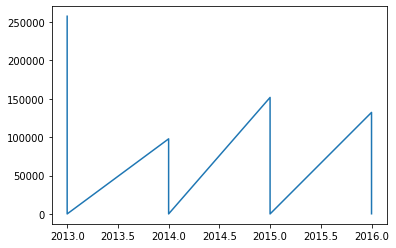

In [26]:
plt.plot(ds.ArchiveYear, ds.AcresBurned)

plt.show()